In [8]:
import pandas as pd

def load_data(file_path):
    df = pd.read_csv(file_path)
    print("Initial Shape:", df.shape)
    print(df.info())
    return df

data = load_data('Salesstore.csv') 


Initial Shape: (730, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_ID              730 non-null    int64  
 1   Order_Priority        730 non-null    object 
 2   Order_Quantity        730 non-null    int64  
 3   Sales                 730 non-null    float64
 4   Ship_Mode             730 non-null    object 
 5   Profit                730 non-null    float64
 6   Customer_Name         730 non-null    object 
 7   Region                730 non-null    object 
 8   Customer_Segment      730 non-null    object 
 9   Product_Category      730 non-null    object 
 10  Product_Sub-Category  730 non-null    object 
 11  Product_Name          730 non-null    object 
 12  Product_Container     730 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 74.3+ KB
None


In [9]:
def clean_data(df):
    df = df.drop_duplicates()
    df = df.dropna(axis=0  
    return df

data = clean_data(data)
print("Cleaned Shape:", data.shape)


Cleaned Shape: (730, 13)


In [13]:
from scipy.stats import zscore

df = df[(zscore(df[['Sales', 'Profit']]) < 3).all(axis=1)]
print(df.shape)


(710, 13)


In [17]:
# Descriptive statistics for numerical columns
print(df[['Sales', 'Profit']].describe())


             Sales       Profit
count   710.000000   710.000000
mean   1139.602165   127.811549
std    1674.223661   552.461280
min       8.600000 -3061.820000
25%     167.207500   -77.132500
50%     410.995000    -1.955000
75%    1326.405000   164.942500
max    9620.820000  2795.360000


In [18]:
print("Sales Variance:", df['Sales'].var())
print("Profit Variance:", df['Profit'].var())

print("Sales Std Dev:", df['Sales'].std())
print("Profit Std Dev:", df['Profit'].std())


Sales Variance: 2803024.867716595
Profit Variance: 305213.4657502057
Sales Std Dev: 1674.223661198406
Profit Std Dev: 552.4612798651193


In [19]:
# Pearson correlation between numerical variables
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix[['Sales', 'Profit']])


                   Sales    Profit
Order_ID       -0.020442  0.004525
Order_Quantity  0.304166  0.262221
Sales           1.000000  0.659139
Profit          0.659139  1.000000


C:\ProgramData\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


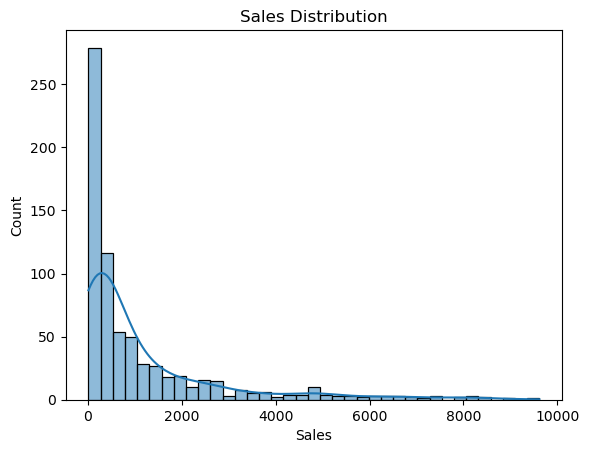

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()


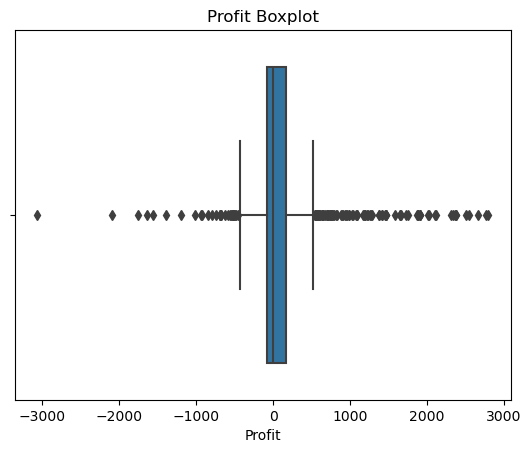

In [21]:
sns.boxplot(x=df['Profit'])
plt.title('Profit Boxplot')
plt.show()


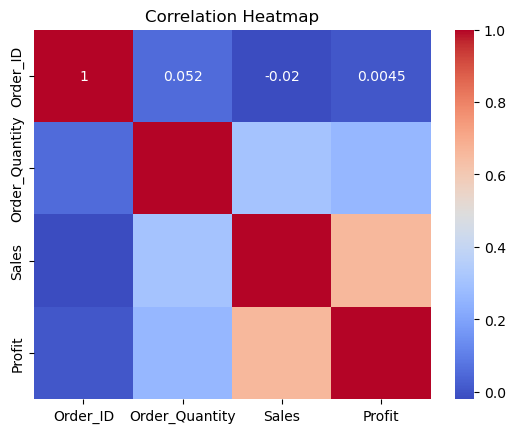

In [22]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
